## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv("german_credit.csv")
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [3]:
data.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [4]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [5]:
data.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

Из приведенной таблицы видно, что явных пропусков в данных нет 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
status                     1000 non-null object
duration                   1000 non-null int64
credit_history             1000 non-null object
purpose                    1000 non-null object
amount                     1000 non-null int64
savings                    1000 non-null object
employment_duration        1000 non-null object
installment_rate           1000 non-null object
personal_status_sex        1000 non-null object
other_debtors              1000 non-null object
present_residence          1000 non-null object
property                   1000 non-null object
age                        1000 non-null int64
other_installment_plans    1000 non-null object
housing                    1000 non-null object
number_credits             1000 non-null object
job                        1000 non-null object
people_liable              1000 non-null object
telephone                  1000 n

Количественными признаками являются размер кредита [amount], возраст занимателя [age] и длительность кредита [duration].

Бинарными признаками можно назвать наличие телефона [telephone] и то, является ли заниматель иностранцем [foreign_worker].

К порядковым признакам я отнесла сбережения [savings], стаж работы [employment_duration], процент от дохода [installment rate], тип жилья [housing], тип труда [job], размер текущего счета [status], срок проживания [present_residence], наличие гарантий [other_debtors].

К категориальным признакам можно отнести кредитную историю занимателя [credit_history], цель кредита [purpose], личный статус [personal_status_sex], число предыдущих кредитов [number_credits], дополнительные свойства [property], [other_installment_plans].

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [7]:
data.groupby(['purpose'])['amount'].apply(lambda x: x.mean())

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [8]:
((data.age < 30) & (data.housing == 'rent')).sum() / (data.age < 30).sum()

0.6666666666666666

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [9]:
print(*set(data['number_credits']), sep =', ')

>= 6, 2-3, 4-5, 1


In [10]:
print('Число иностранцев имеющих больше 3-х кредитов:')
print((((data.number_credits == '4-5') | (data.number_credits == '>= 6')) & (data.foreign_worker == 'yes')).sum())

Число иностранцев имеющих больше 3-х кредитов:
1


### Задание 6 (1 балл)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

In [12]:
import math

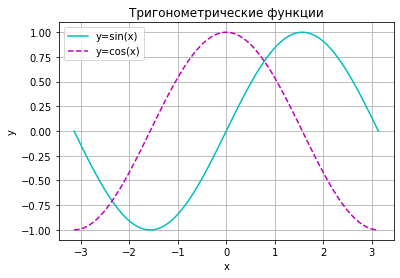

In [13]:
x = np.linspace( -math.pi, math.pi,100)
plt.plot(x, np.sin(x), label='y=sin(x)', color = 'c')
plt.plot(x, np.cos(x), label='y=cos(x)', color = 'm', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Тригонометрические функции")
plt.legend()
plt.grid(True)
plt.show()

Выводов по тригонометрии нет, график красивый

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

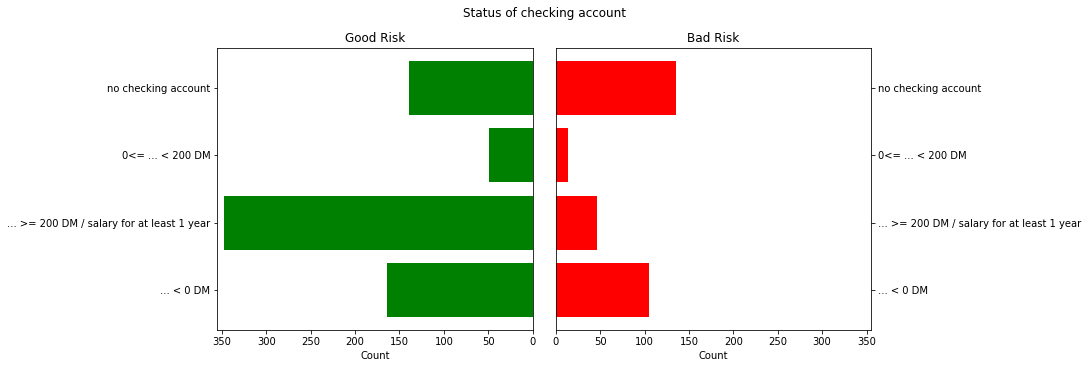

In [14]:
c = (data[data['credit_risk'] == 'good']).groupby('status')['credit_risk'].count()
d = (data[data['credit_risk'] == 'bad']).groupby('status')['credit_risk'].count() 

fig, ax = plt.subplots(1, 2, figsize = (15, 5), constrained_layout = True, sharey=True) 
fig.suptitle('Status of checking account') 
ax[0].barh(np.sort(data['status'].unique()), c, color = 'g') 
ax[1].barh(np.sort(data['status'].unique()), d, color = 'r')
ax[1].tick_params(axis='y', right = True, left = False, labelright = True)
ax[0].set_xlim(355, 0) 
ax[1].set_xlim(0, 355) 
ax[0].set_xlabel('Count') 
ax[1].set_xlabel('Count') 
ax[0].set_title('Good Risk') 
ax[1].set_title('Bad Risk')
plt.show()

Разница в количестве положительных и отрицательных кейсов менее всего выражена при отсутствии текцщего счета. Для всех остальных статусов счета количество положительных кейсов заметно превалирует. 

### Задание 8  (0.5 балла)

In [15]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

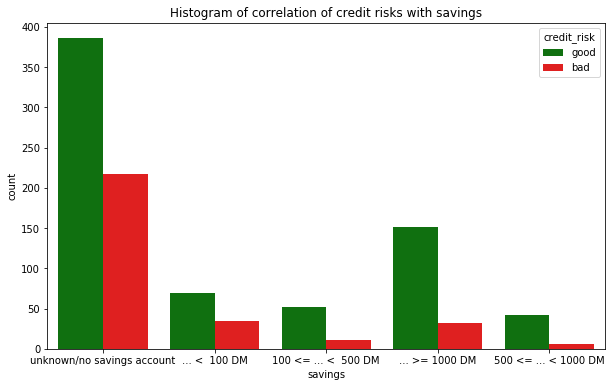

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Histogram of correlation of credit risks with savings')
ax = sns.countplot(data['savings'], hue=data['credit_risk'], palette=["g", "r"])
plt.show()

Код для построения графика с использованием seaborn значительно легче. Визуализация одинакого удобна.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

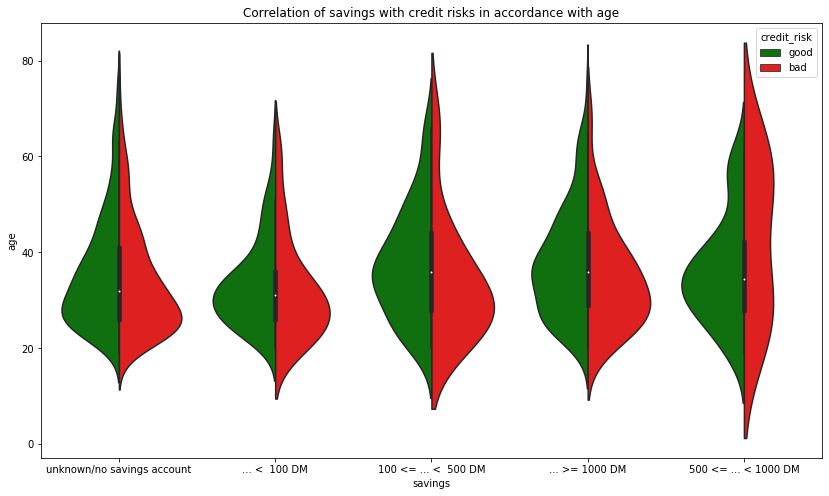

In [17]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.title('Correlation of savings with credit risks in accordance with age')
sns.violinplot(data=data, x=data['savings'], y="age", hue="credit_risk", split=True, palette=["g", "r"])
plt.show()

График наиболее удачно отражает влияние двух признаков, один из которых количественный. 

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

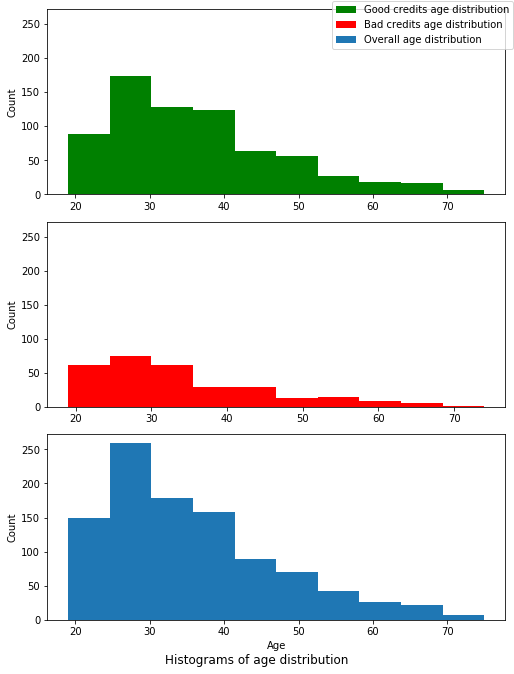

In [18]:
fig, ax = plt.subplots(3, 1, figsize = (7, 9), constrained_layout = True, sharey=True)
fig.suptitle('Histograms of age distribution', x = 0.5, y = 0)
ax[0].hist(data.age[data.credit_risk == 'good'], color = 'g') 
ax[1].hist(data.age[data.credit_risk == 'bad'], color = 'r')
ax[2].hist(data.age)
fig.legend(labels=('Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution'), loc='upper right', borderaxespad = 0.1)
ax[2].set_xlabel('Age') 
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count') 
ax[2].set_ylabel('Count')
plt.show()

Гистограммы демонстрируют, что, в общем случае, большая часть заемщиков находится в возрастном интервале 20 - 40 лет. 
Отрицательные кейсы менее зависимы от возраста, чем положительные кейсы. 

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

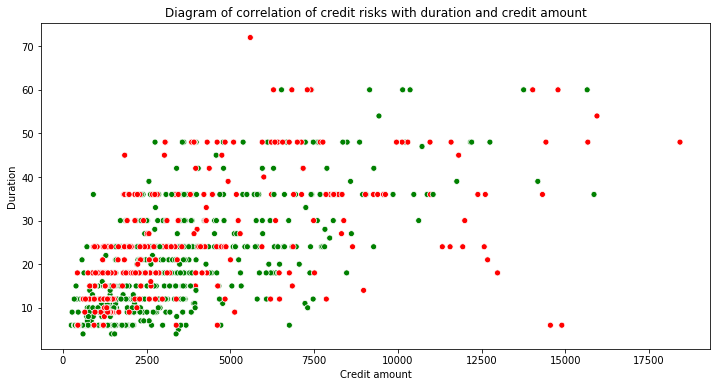

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.color_palette()
plt.title('Diagram of correlation of credit risks with duration and credit amount')
sns.scatterplot(x = "amount", y = "duration", hue="credit_risk", palette=["g", "r"], data=data, legend = False, ax=ax)
plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.show()

Диаграмма демонстрирует, что большая часть кредитов соответствует меньшей сумме заема (< 5000) с меньшей продолжительностью выплат (< 40). 

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

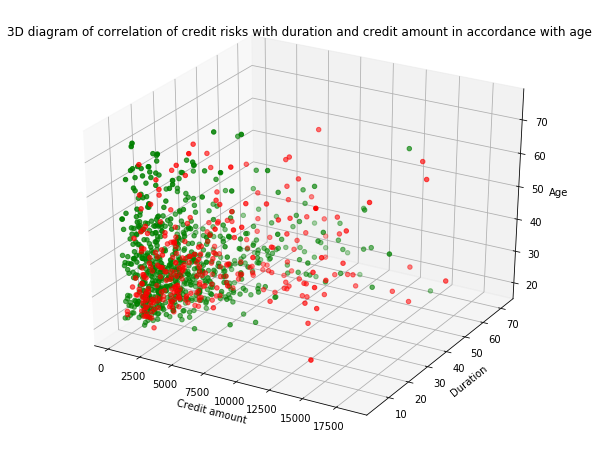

In [20]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(data[data['credit_risk']=='good'].amount, data[data['credit_risk']=='good'].duration, 
           data[data['credit_risk']=='good'].age, c='g', s=20) 
ax.scatter(data[data['credit_risk'] == 'bad'].amount, data[data['credit_risk'] == 'bad'].duration, 
           data[data['credit_risk'] == 'bad'].age, c = 'r', s = 20) 
plt.title('3D diagram of correlation of credit risks with duration and credit amount in accordance with age') 
ax.set_xlabel('Credit amount') 
ax.set_ylabel('Duration') 
ax.set_zlabel('Age')
plt.show()

Из диаграммы видно, что при увеличении размера кредита и увеличению продолжительности выплат увеличивается процент отрицательных кейсов.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

Комментарий: 1) Перекодирован целевой признак. 2) Отношение мной каких-то признаков к порядковым субъективно, например, тип жилья. Формально это качественный признак, но его можно отранжировать: жить в собственном доме лучше чем в арендованном и тд.

In [21]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [22]:
dct0 = {'no' : 0, 'yes (under customer name)' : 1}
dct1 = {'no' : 0, 'yes' : 1}
dct2 = {'good' : 1, 'bad' : 0}
dct3 = {'unemployed/unskilled - non-resident' : 0, 'unskilled - resident' : 1, 'manager/self-empl./highly qualif. employee' : 2, 'skilled employee/official' :3}
dct4 = {'1' : 0, '2-3' : 1, '4-5' : 2, '>= 6' : 3}
dct5 = {'unknown/no savings account' : 0, '... <  100 DM' : 1, '100 <= ... <  500 DM' : 2, '500 <= ... < 1000 DM' : 3, '... >= 1000 DM' : 4}
dct6 = {'unemployed' : 0, '< 1 yr' : 1, '1 <= ... < 4 yrs' : 2, '4 <= ... < 7 yrs' : 3, '>= 7 yrs' :4}
dct7 = {'< 20' : 0, '20 <= ... < 25' : 1, '25 <= ... < 35' : 2, '>= 35' : 3}
dct8 = {'rent' : 0, 'for free' : 1, 'own' : 2}
dct9 = {'no checking account' : 0, '... < 0 DM' : 1, '0<= ... < 200 DM' : 2, '... >= 200 DM / salary for at least 1 year' : 3}
dct10 = {'< 1 yr' : 0, '1 <= ... < 4 yrs' : 1, '4 <= ... < 7 yrs' : 2, '>= 7 yrs' : 3}
dct11 = {'none' : 0, 'co-applicant' : 1, 'guarantor' : 2}

In [23]:
data['foreign_worker'] = data['foreign_worker'].map(dct1)
data['telephone'] = data['telephone'].map(dct0)
data['credit_risk'] = data['credit_risk'].map(dct2)
data['job'] = data['job'].map(dct3)
data['number_credits'] = data['number_credits'].map(dct4)
data['savings'] = data['savings'].map(dct5) 
data['employment_duration'] = data['employment_duration'].map(dct6)
data['installment_rate'] = data['installment_rate'].map(dct7)
data['housing'] = data['housing'].map(dct8)
data['status'] = data['status'].map(dct9)
data['present_residence'] = data['present_residence'].map(dct10)
data['other_debtors'] = data['other_debtors'].map(dct11)

In [24]:
data
data.drop({'credit_history', 'purpose', 'personal_status_sex', 'property', 'other_installment_plans', 'people_liable'}, axis = 1, inplace = True)

In [25]:
print(*set(data['status']), sep =', ')

0, 1, 2, 3


In [26]:
data.head()

,status,duration,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,age,housing,number_credits,job,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,0,0,3,21,1,0,3,0,0,1
1,0,9,2799,0,2,2,0,1,36,1,1,3,0,0,1
2,1,12,841,1,3,2,0,3,23,1,0,1,0,0,1
3,0,12,2122,0,2,1,0,1,39,1,1,1,0,1,1
4,0,12,2171,0,2,0,0,3,38,0,1,1,0,1,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

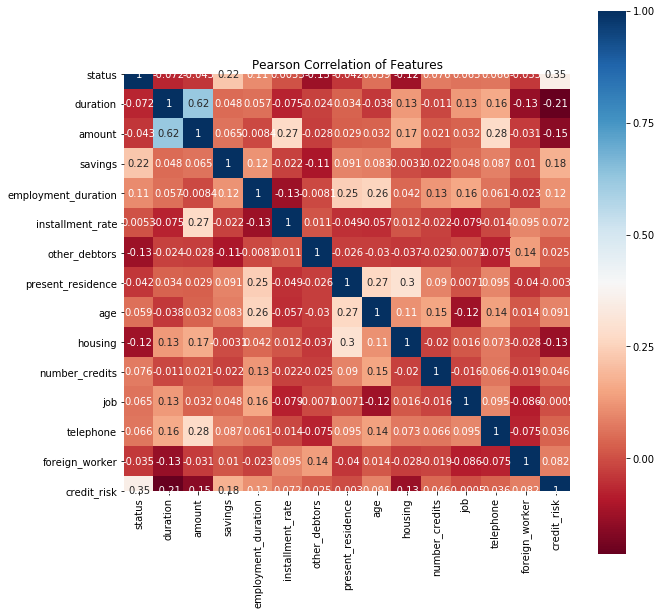

In [27]:
NumericData = data[data.dtypes[data.dtypes != 'object'].index]
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))

plt.title('Pearson Correlation of Features', y=1)
sns.heatmap(NumericData.corr(), 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [29]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [74]:
def predict(Xtest: np.array) -> np.array:
    y_pred = (Xtest * np.array([10, 0.1, 1, 10, 10, 10, 2, 1, 10, 2, 10, 1, 1, 0.1])).sum(axis = 1)
    norm = np.linalg.norm(y_pred)
    return np.rint((y_pred / norm) * 10)

from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
normalizer = preprocessing.MinMaxScaler() # Масштабирование данных
X_norm = normalizer.fit_transform(X)
X = pd.DataFrame(data=X_norm)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

accuracy_score(y_test, predict(X_test))

0.708